# Telco Customer Churn Prediction

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


In [35]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

## Data

In [36]:
df.sample(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4272,1043-YCUTE,Male,0,Yes,No,56,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),25.15,1327.15,Yes
4685,0345-XMMUG,Female,0,Yes,No,46,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),108.90,4854.3,No
5726,2888-ADFAO,Female,0,Yes,Yes,47,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.30,1041.8,No
1257,0723-VSOBE,Female,1,No,No,45,No,No phone service,DSL,No,...,No,No,No,Yes,One year,No,Electronic check,34.20,1596.6,No
3322,8058-JMEQO,Female,1,No,No,9,Yes,Yes,Fiber optic,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,84.45,762.5,Yes
3900,8008-OTEZX,Female,0,Yes,Yes,35,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.65,708.8,No
646,0887-HJGAR,Male,0,No,No,1,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,45.70,45.7,Yes
2685,5781-BKHOP,Female,0,Yes,No,72,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,No,Two year,No,Bank transfer (automatic),100.65,7334.05,No
1497,3128-YOVTD,Female,0,Yes,Yes,51,Yes,No,Fiber optic,Yes,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),79.15,4018.55,No
198,7255-SSFBC,Male,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),112.25,8041.65,No


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [38]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [39]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

## Data Cleaning

In [40]:
print(df['gender'].unique())

['Female' 'Male']


In [41]:
# transform target value 
df['Churn'] = df['Churn'].map({'Yes':1,'No':0})

## Data Exploration

### Gender

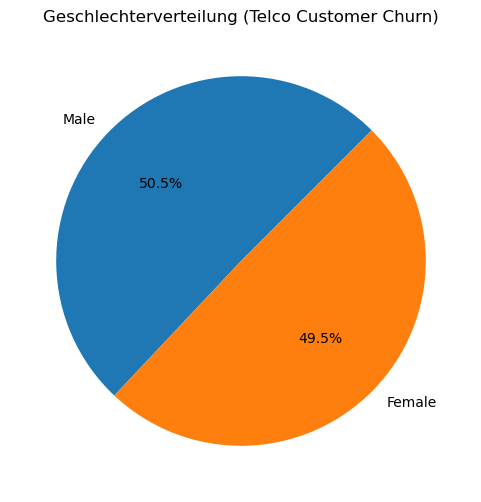

In [42]:
# Geschlechter zählen
gender_counts = df['gender'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=45)
plt.title('Geschlechterverteilung (Telco Customer Churn)')
plt.show()

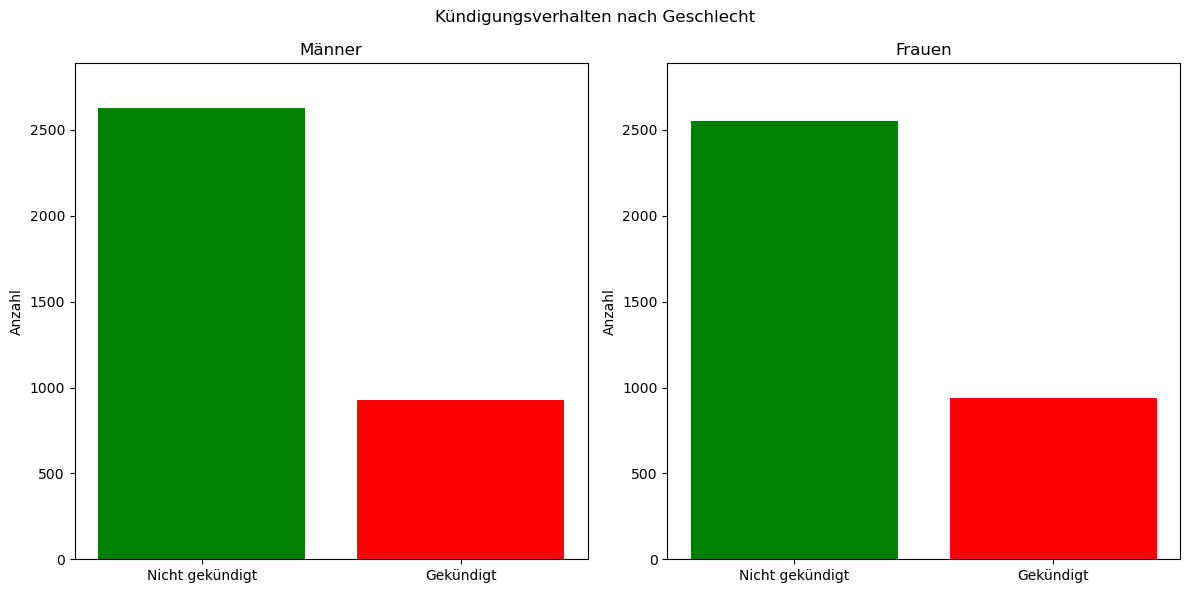

In [43]:
male_churn = df[df['gender'] == 'Male']['Churn'].value_counts()
female_churn = df[df['gender'] == 'Female']['Churn'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
# Männer
axes[0].bar(['Nicht gekündigt', 'Gekündigt'], male_churn.values, color=['green', 'red'])
axes[0].set_title('Männer')
axes[0].set_ylabel('Anzahl')
axes[0].set_ylim(0, max(male_churn.max(), female_churn.max()) * 1.1)

# Frauen
axes[1].bar(['Nicht gekündigt', 'Gekündigt'], female_churn.values, color=['green', 'red'])
axes[1].set_title('Frauen')
axes[1].set_ylabel('Anzahl')
axes[1].set_ylim(0, max(male_churn.max(), female_churn.max()) * 1.1)

plt.suptitle('Kündigungsverhalten nach Geschlecht')
plt.tight_layout()
plt.show()

### Dauer

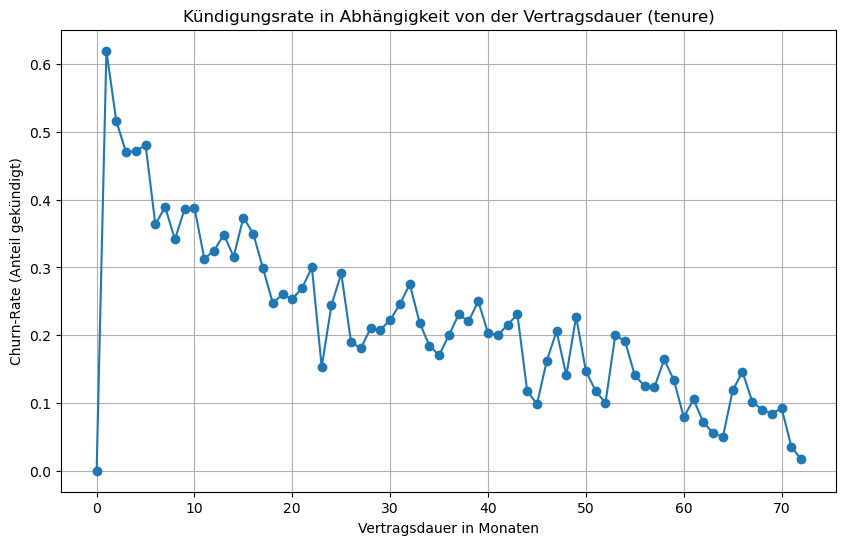

In [44]:
tenure_churn = df.groupby('tenure')['Churn'].mean()

plt.figure(figsize=(10, 6))
plt.plot(tenure_churn.index, tenure_churn.values, marker='o')
plt.title('Kündigungsrate in Abhängigkeit von der Vertragsdauer (tenure)')
plt.xlabel('Vertragsdauer in Monaten')
plt.ylabel('Churn-Rate (Anteil gekündigt)')
plt.grid(True)
plt.show()

## ML Model

In [45]:
y = df['Churn']
df = df.drop(columns=['customerID', 'Churn'])
df = pd.get_dummies(df, drop_first=True)
X = df


In [46]:
# 80% Training, 20% Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [48]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [50]:
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[918 117]
 [172 202]]
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1035
           1       0.63      0.54      0.58       374

    accuracy                           0.79      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.79      0.79      1409

